<a href="https://colab.research.google.com/github/Rithunrajendran/Netflix-Movies-and-TV-Shows/blob/main/Team_Netflix_Movies_and_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies and TV Shows**



##### **Project Type**    - Unsupervised
##### **Contribution**    -Team
##### **Team Member 1** - Rithun Rajendran M.K
##### **Team Member 2** - Affan Ahmad Abdul Wahid
##### **Team Member 3** - Prajwal Bharadwaj
##### **Team Member 4** - Shreyash Kumar
##### **Team Member 5** -Md Ashique Ali

# **Project Summary -**


Netflix Movies and TV Shows is done by group of 5 members.All the members have equal contribution in this project.In this project we first got the NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv file , as we downloaded the csv files from the almabetter dashboard we encoded the file in the colab notebook by mounting the drive.We named the csv files as df_Netflix and included the csv file in it.Then we checked the missing/null values in the dataset and we found that there are 7787 rows and 12 columns.In this dataset only the column release_year is have integer data type.The dataset does not contain any duplicate values.There are null values present in director,cast,country,date_added and rating columns. Then we done certain visualization techniques on the dataset to find the relationship between the features.We have created cluster using following attributes: director, cast, country,listed_in, type,duration and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.Then we have reduced the dimension of the project dataset using PCA which is a dimensionality reduction technique used to improve performance.We have used  methods such as the Elbow method, Silhouette score, Dendrogram, and used K-Means Clustering and Agglomerative Hierarchical Clustering algorithms, respectively, with the help of K-Means clustering analysis, we determined that the optimal number of clusters for our dataset is 6. Using the hierarchical clustering algorithm, we got the otimal of  2 clusters.

# **GitHub Link -**

Rithun Rajendran M.K-https://github.com/Rithunrajendran/Netflix-Movies-and-TV-Shows

# **Problem Statement**


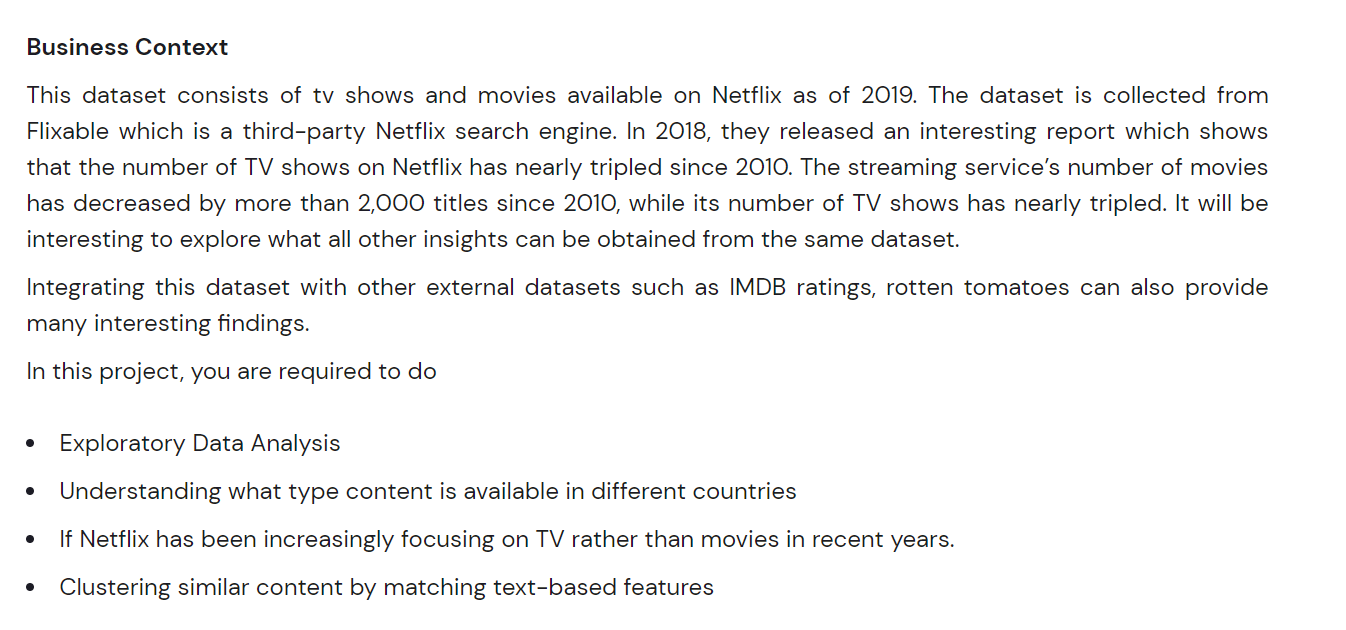

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [137]:
# Importing basic libraries
import pandas as pd
import numpy as np

# importing libraries for visualization
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

### Dataset Loading

In [138]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
# Load Dataset
df_Netflix = pd.read_csv('/content/drive/MyDrive/Capstone project 4_Netflix movies and tv shows/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [151]:
# Dataset First Look
df_Netflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [150]:
# Dataset Rows & Columns count
df_Netflix.shape

(7787, 12)

### Dataset Information

In [146]:
# Dataset Info
df_Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [147]:
# Dataset Duplicate Value Count
len(df_Netflix[df_Netflix.duplicated()])

0

#### Missing Values/Null Values

In [148]:
# Missing Values/Null Values Count
print(df_Netflix.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


<Axes: >

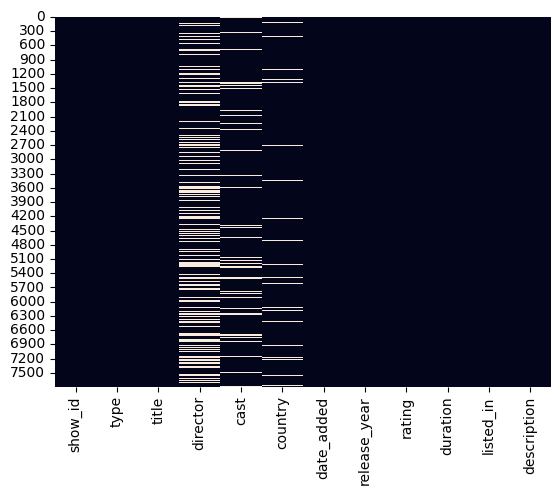

In [149]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df_Netflix.isnull(), cbar=False)

### What did you know about your dataset?



In the Netflix and TV shows Clustering dataset there are 7787 rows and 12 columns.In this dataset only the column release_year is have integer data type.The dataset does not contain any duplicate values.There are null values present in director,cast,country,date_added and rating columns  

## ***2. Understanding Your Variables***

In [152]:
# Dataset Columns
df_Netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [153]:
# Dataset Describe
df_Netflix.describe(include='all').T

count unique  \
show_id         7787   7787   
type            7787      2   
title           7787   7787   
director        5398   4049   
cast            7069   6831   
country         7280    681   
date_added      7777   1565   
release_year  7787.0    NaN   
rating          7780     14   
duration        7787    216   
listed_in       7787    492   
description     7787   7769   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  5377   
title                                                        3%     1   
director                                 Raúl Campos, Jan Suter    18   
cast                                         David Attenborough    18   
country                                           United States  2555   
date_added                                      January 1, 2020   118   
release_year                                                NaN   NaN   
rating                                                    TV-MA  2863   
duration                                               1 Season  1608   
listed_in                                         Documentaries   334   
description   Multiple women report their husbands as missin...     3   

                    mean       std     min     25%     50%     75%     max  
show_id              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
type                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
title                NaN       NaN     NaN     NaN     NaN     NaN     NaN  
director             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
cast                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
country              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
date_added           NaN       NaN     NaN     NaN     NaN     NaN     NaN  
release_year  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0  2021.0  
rating               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
duration             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
listed_in            NaN       NaN     NaN     NaN     NaN     NaN     NaN  
description          NaN       NaN     NaN     NaN     NaN     NaN     NaN

### Variables Description 

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

1. **show_id**: Unique identifier for each movie/show.

2. **type**: Indicates whether the entry is a movie or a TV show.
3. **title**: Name of the movie or TV show.
4. **director**: Name of the director(s) of the movie or TV show.
5. **cast**: Names of the actors and actresses featured in the movie or TV show.
6. **country**: Country or countries where the movie or TV show was produced.
7. **date_added**: Date when the movie or TV show was added to Netflix.
8. **release_year**: Year when the movie or TV show was released.
9. **rating**: TV rating or movie rating of the movie or TV show.
10. **duration**: Length of the movie or TV show in minutes or seasons.
11. **listed_in**: Categories or genres of the movie or TV show.
12. **description**: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [154]:
# Check Unique Values for each variable.
for i in df_Netflix.columns.tolist():
 print("No. of unique values in ",i,"is",df_Netflix[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [155]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df_netflix
df_netflix=df_Netflix.copy()

Handling missing values

In [156]:
#checking null values in each columns
print(df_Netflix.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


The missing values in the director, cast, and country attributes can be replaced with 'Unknown'

10 records with missing values in the date_added column can be dropped.

The missing values in rating can be imputed with its mode, since this attribute is discrete

In [157]:
# imputing with unknown in null values of director and cast feature
df_netflix[['director','cast','country']] = df_netflix[['director','cast','country']].fillna('Unknown')
df_netflix['rating'] = df_netflix['rating'].fillna(df_netflix['rating'].mode()[0])
df_netflix.dropna(axis=0, inplace = True)

In [158]:
df_netflix.shape

(7777, 12)

In [159]:
#Rechecking null values in each columns
print(df_netflix.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


Adding new Features to our dataset.

In [160]:
# Typecasting 'date_added' from string to datetime
df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'])

In [161]:
# Adding Month,Month name and Year columns

# Month column
df_netflix['month_added'] = df_netflix['date_added'].dt.month

# Month name column
df_netflix['month_name_added'] = df_netflix['date_added'].dt.month_name()

# Year column
df_netflix['year_added'] = df_netflix['date_added'].dt.year

In [162]:
# Retrieving just the first i.e the main actor/actress from the cast
df_netflix['lead_actor'] = df_netflix['cast'].apply(lambda x: x.split(",")[0])

Binning of Rating attribute

In rating columns we have different categories these are content rating classifications that are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's understand each of them and binnig them accordingly:

TV-MA: This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

R: This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

PG-13: This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

TV-14: This rating is used for TV shows that may not be suitable for children under 14. It may contain violence, strong language, sexual situations, and suggestive dialogue.

TV-PG: This rating is used for TV shows that may not be suitable for children under 8. It may contain mild violence, language, and suggestive content.

NR: This stands for "Not Rated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

TV-G: This rating is used for TV shows that are suitable for all ages. It may contain some mild violence, language, and suggestive content.

TV-Y: This rating is used for children's TV shows that are suitable for all ages. It is intended to be appropriate for preschool children.

TV-Y7: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain mild violence and scary content.

PG: This rating is used for movies that may not be suitable for children under 10. It may contain mild language, some violence, and some suggestive content.

G: This rating is used for movies that are suitable for general audiences. It may contain some mild language and some violence.

NC-17: This rating is used for movies that are intended for adults only. It may contain explicit sexual content, violence, and language.

TV-Y7-FV: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain fantasy violence.

UR: This stands for "Unrated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

Let's not complicate it and create bins as following:

Adult Content: TV-MA, NC-17, R
Children Content: TV-PG, PG, TV-G, G
Teen Content: PG-13, TV-14
Family-friendly Content: TV-Y, TV-Y7, TV-Y7-FV
Not Rated: NR, UR

In [163]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df_netflix['rating'].replace(rating_map, inplace = True)
df_netflix['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

Separating the Movies and TV shows

In [164]:
# Seprating the dataframes 
df_movies= df_netflix[df_netflix['type']== 'Movie']
df_tvshows= df_netflix[df_netflix['type']== 'TV Show']

# Printing the shape
print(df_movies.shape, df_tvshows.shape)

(5377, 16) (2400, 16)


In [165]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           7777 non-null   object        
 1   type              7777 non-null   object        
 2   title             7777 non-null   object        
 3   director          7777 non-null   object        
 4   cast              7777 non-null   object        
 5   country           7777 non-null   object        
 6   date_added        7777 non-null   datetime64[ns]
 7   release_year      7777 non-null   int64         
 8   rating            7777 non-null   object        
 9   duration          7777 non-null   object        
 10  listed_in         7777 non-null   object        
 11  description       7777 non-null   object        
 12  month_added       7777 non-null   int64         
 13  month_name_added  7777 non-null   object        
 14  year_added        7777 n

In [166]:
df_netflix.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year         rating   duration  \
0 2020-08-14          2020  Adult Content  4 Seasons   
1 2016-12-23          2016  Adult Content     93 min   
2 2018-12-20          2011  Adult Content     78 min   
3 2017-11-16          2009   Teen Content     80 min   
4 2020-01-01          2008   Teen Content    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month_added  \
0  In a future where the elite inhabit an island ...            8   
1  After a devastating earthquake hits Mexico Cit...           12   
2  When an army recruit is found dead, his fellow...           12   
3  In a postapocalyptic world, rag-doll robots hi...           11   
4  A brilliant group of students become card-coun...            1   

  month_name_added  year_added     lead_actor  
0           August        2020    João Miguel  
1         December        2016  Demián Bichir  
2         December        2018      Tedd Chan  
3         November        2017    Elijah Wood  
4          January        2020   Jim Sturgess

### What all manipulations have you done and insights you found?

Here we have imputed the missing values in  in the director, cast, and country attributes can be replaced with 'Unknown',then 10 records which was missing in  in the date_added column has be dropped and the missing values in rating column is imputed with mode.Then we have Typecasting 'date_added' from string to datetime,Adding Month,Month name and Year columns and retrieved just the  main actor/actress from the cast.We have also binned the rating columns to 5 bins namely 'Adult Content', 'Teen Content', 'Children Content', 'Not Rated' and 
'Family-friendly Content'.At last we have splitted the dataframe into two df, one is 'df_movies' that contains only Movies and the other is 'df_tvshows' that contains only TV Shows for our further analysis.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Top 10 directors of shows

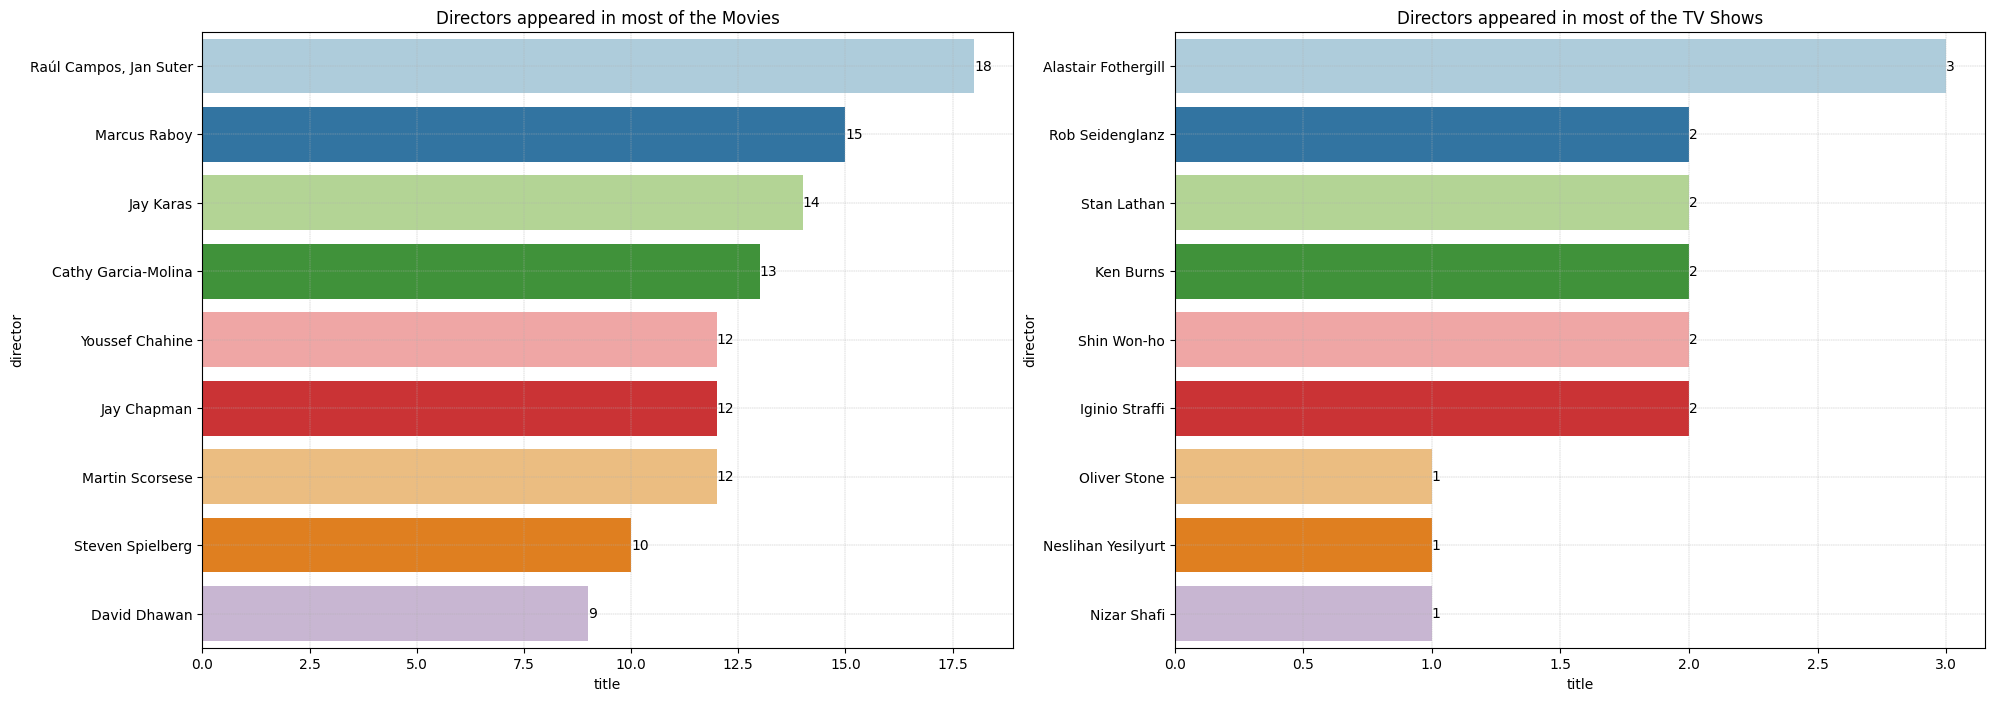

In [167]:
# Chart - 1 visualization code
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_director = i.groupby(['director']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "director",x = 'title', data = df_director, palette='Paired')
  plt.title(f'Directors appeared in most of the {j}')
  plt.grid(linestyle='--', linewidth=0.3)
  plots.bar_label(plots.containers[0])
plt.show()
     

##### 1. Why did you pick the specific chart?

The bar graph helps to compare the different sets of data among different groups easily. It shows the relationship using two axes, in which the categories are on one axis and the discrete values are on the other axis. The graph shows the major changes in data over time.

##### 2. What is/are the insight(s) found from the chart?

**Top 3 Tvshow making Directors are**

Alastair Fothergill with 3

Shin Won-ho with 2

Iginio Straffi with 2

**Top 3 movie making Directors are**

Raúl Campos, Jan Suter with 18

Marcus Raboy with 15

Jay Karas with 1

#### Chart - 2 : Number of shows and movies added each year

Text(0.5, 0, '')

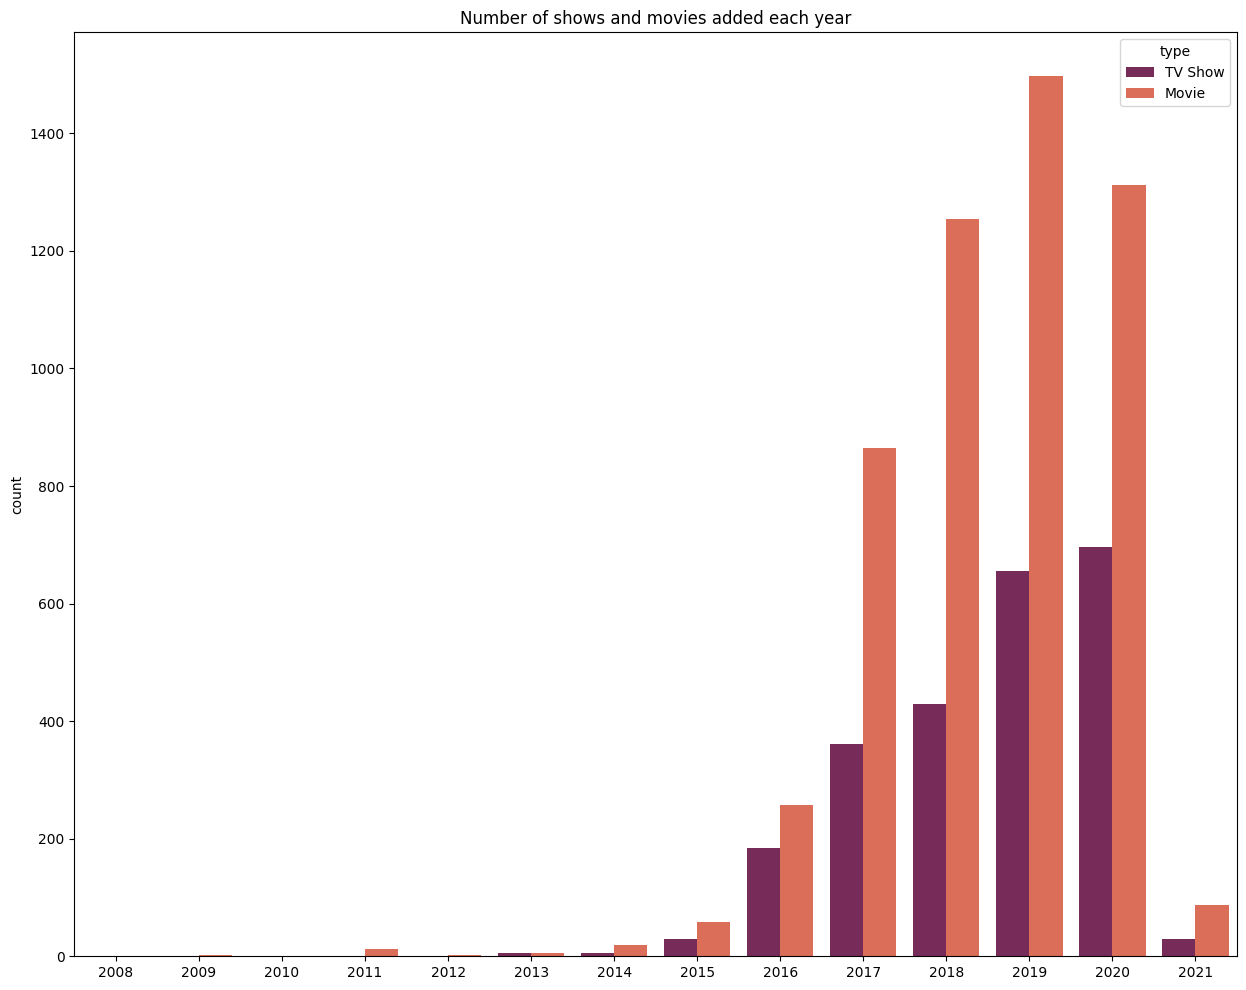

In [168]:
# Chart - 2 visualization code
plt.figure(figsize = (15,12)) 
sns.countplot(x= "year_added",data=df_netflix, hue='type', palette=('rocket'))
plt.title('Number of shows and movies added each year')
plt.xlabel('')

1.Why did you pick the specific chart?

The countplot is used to represent the counts of the observation present in the categorical variable.

##### 2. What is/are the insight(s) found from the chart?

While comparing TV shows and movies,movies always has the upperhand as the number of movies per year keeps on increasing every year but there was a decrease in the number of movies in 2020, this pattern did not effect  the number of TV Shows added in the same year.

#### Chart - 3 : Top 10 countries with most contents

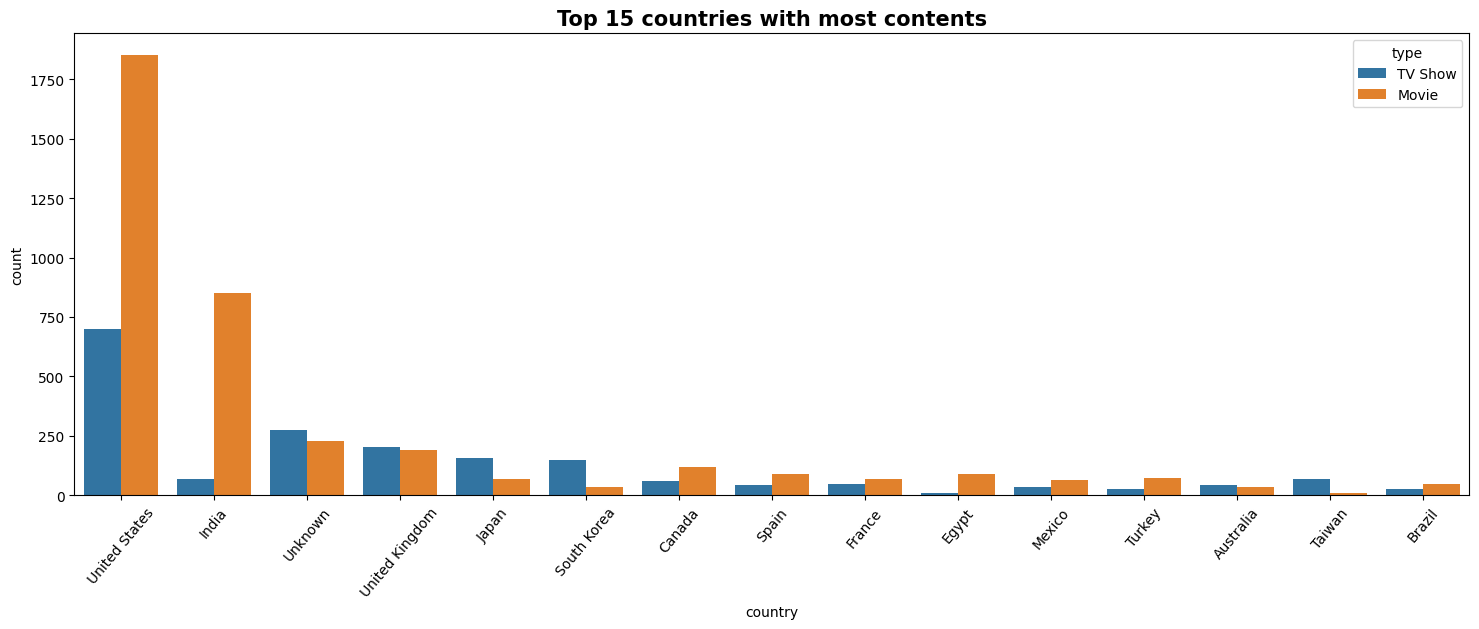

In [169]:
# Chart - 3 visualization code
plt.figure(figsize=(18,6))
sns.countplot(x=df_netflix['country'],order=df_netflix['country'].value_counts().index[0:15],hue=df_netflix['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the counts of the observation present in the categorical variable.

##### 2. What is/are the insight(s) found from the chart?

United States has the most content in both movies and tv shows where as egypt has lowest number of tv shows and south korea in movies.

#### Chart - 4 : Percentage of total number of Movies and TV Shows over Netflix

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

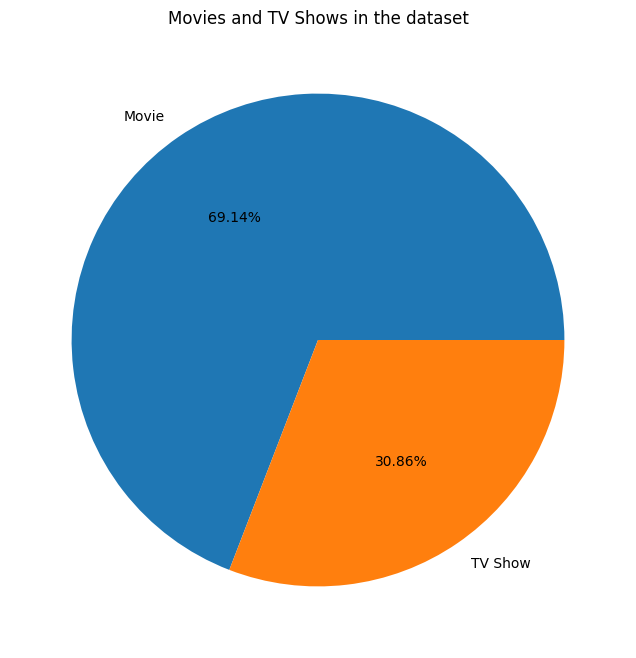

In [170]:
# Chart - 4 visualization code
plt.figure(figsize=(10,8))
df_netflix.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')


##### 1. Why did you pick the specific chart?

A pie plot is a proportional representation of the numerical data in a column.

##### 2. What is/are the insight(s) found from the chart?


On the above chart, there are 69.14% share of Movies while on the other hand 30.86% of TV Shows.

#### Chart - 5 : Top10 Genre of Movies

<Axes: title={'center': 'Top10 Genre of Movies'}, xlabel='count', ylabel='listed_in'>

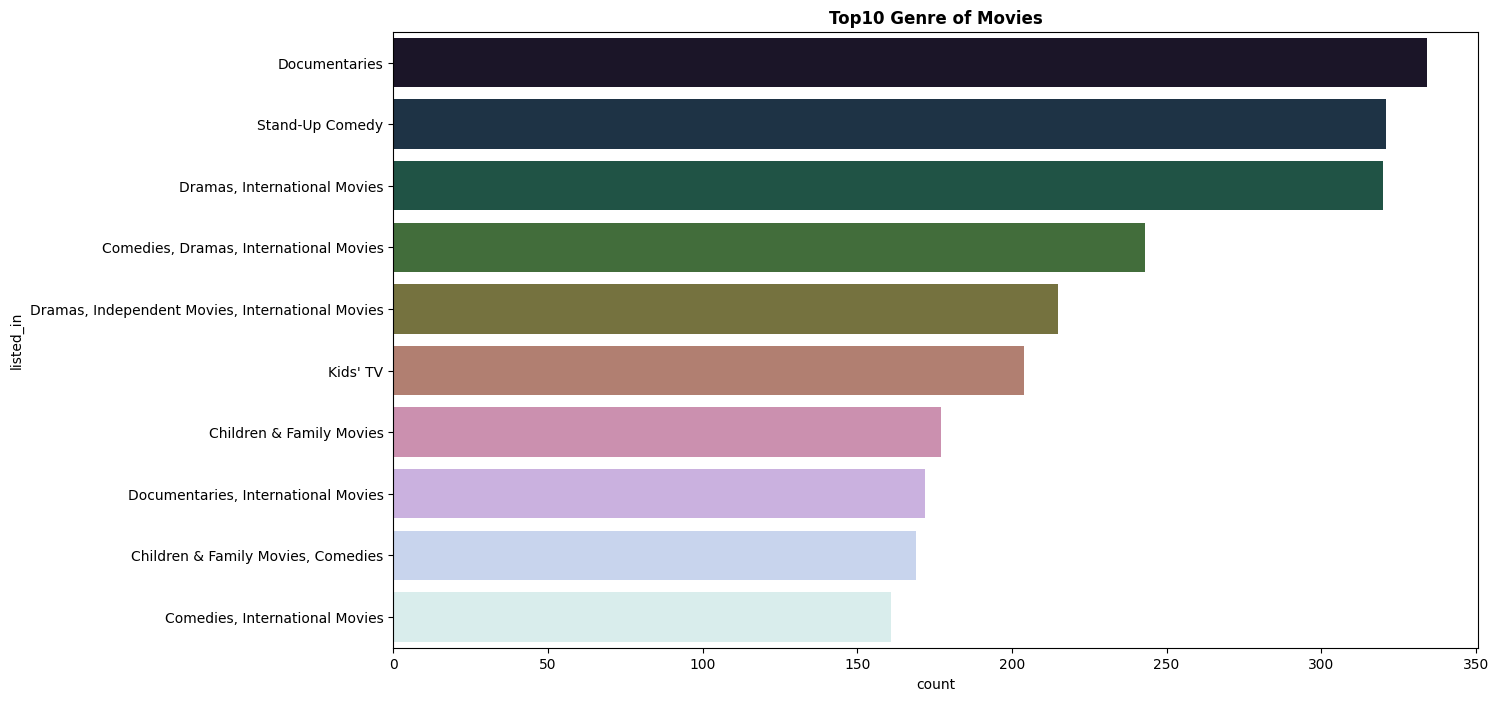

In [171]:
# Chart - 5 visualization code# Chart - 9 visualization code
plt.figure(figsize=(14,8))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=df_netflix['listed_in'],data=df_netflix,order=df_netflix['listed_in'].value_counts().index[0:10],palette="cubehelix")

##### 1. Why did you pick the specific chart?


The countplot is used to represent the counts of the observation present in the categorical variable

##### 2. What is/are the insight(s) found from the chart?

As shown above, we found drama has largest value_counts for movies and comedies has the second large value_counts for movies

#### Chart - 6 : Count plot for releases over years for movies and TV Shows

<Axes: xlabel='count', ylabel='release_year'>

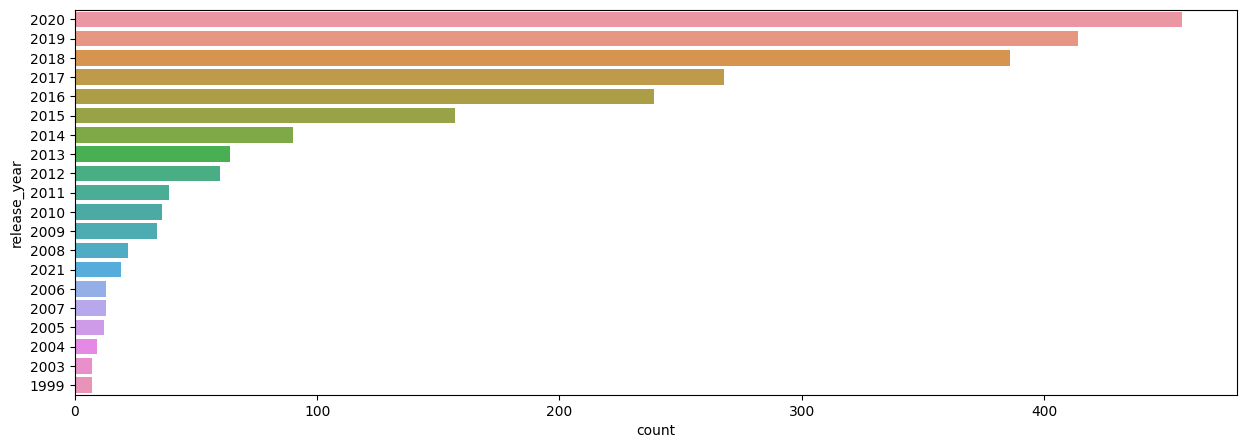

In [172]:
# Chart - 6 visualization code of TV Shows
#Analysing how many movies released per year in last 20 years
plt.figure(figsize=(15,5))
sns.countplot(y=df_tvshows['release_year'],data=df_tvshows,order=df_tvshows['release_year'].value_counts().index[0:20])

<Axes: xlabel='count', ylabel='release_year'>

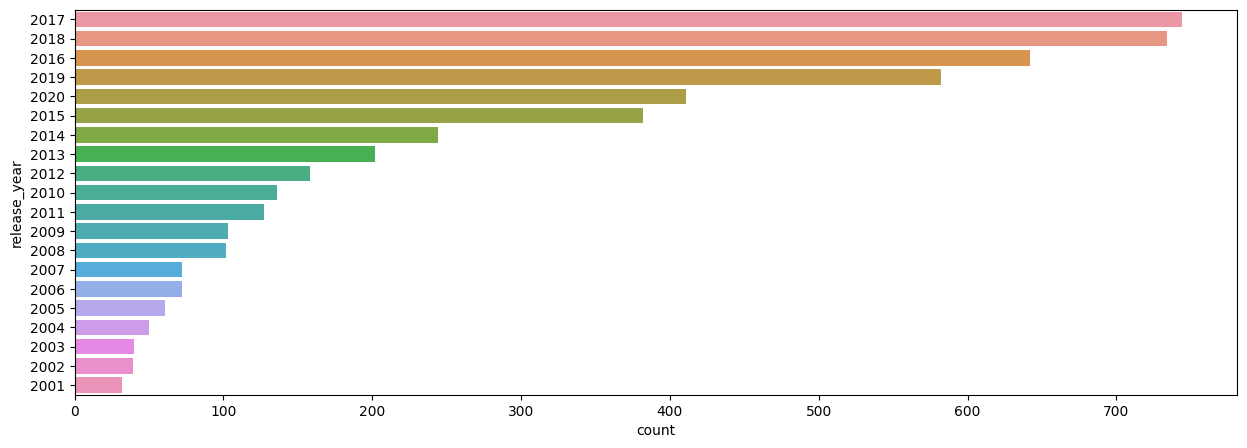

In [173]:
#Analysing how many movies released per year in last 20 years
plt.figure(figsize=(15,5))
sns.countplot(y=df_movies['release_year'],data=df_movies,order=df_movies['release_year'].value_counts().index[0:20])

##### 1. Why did you pick the specific chart?

The countplot is used to represent the counts of the observation present in the categorical variable

##### 2. What is/are the insight(s) found from the chart?

1. For Movies : The maximum number of Movies were released in netflix in between 2015-2020 with the highest number of release on the year 2017.

2. For TV Shows : The maximum number of TV Shows were released in netflix in between 2015-2020 with the highest number of release on the year 2020.



#### Chart - 7 : Distribution of Duration of TV Shows

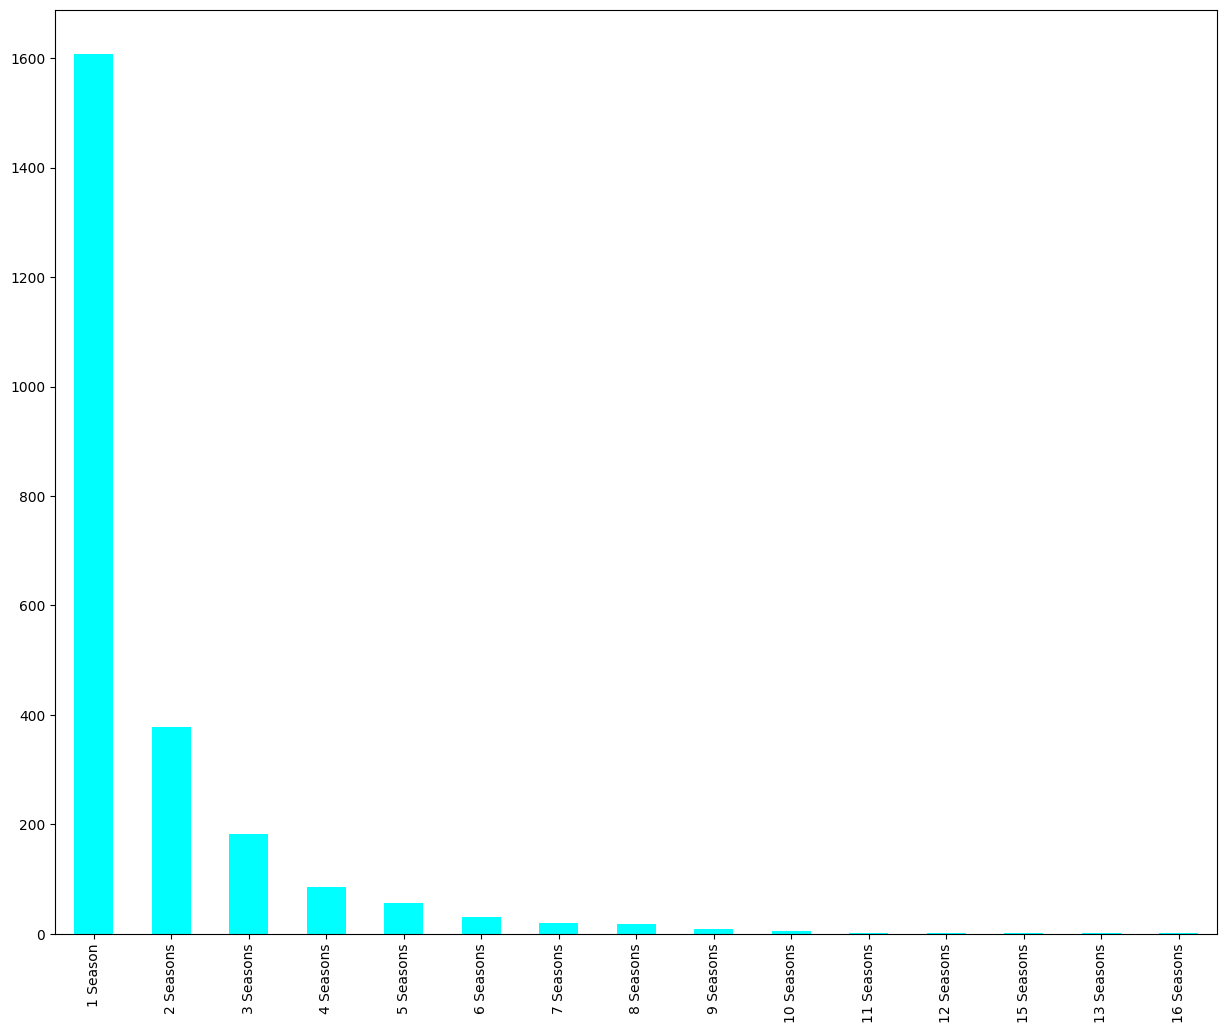

In [174]:
# Chart - 7 visualization code
plt.figure(figsize=(15,12))
df_netflix[df_netflix['type']=='TV Show']['duration'].value_counts().plot(kind='bar',color="cyan")
plt.show()  

##### 1. Why did you pick the specific chart?

The bar graph helps to compare the different sets of data among different groups easily. It shows the relationship using two axes, in which the categories are on one axis and the discrete values are on the other axis. The graph shows the major changes in data over time.

##### 2. What is/are the insight(s) found from the chart?

The countplot of the distribution of TV show durations in seasons on Netflix shows that the most common duration for TV shows on Netflix is one season, followed by two seasons.

#### Chart - 8 :Top 10 Actors on Netflix

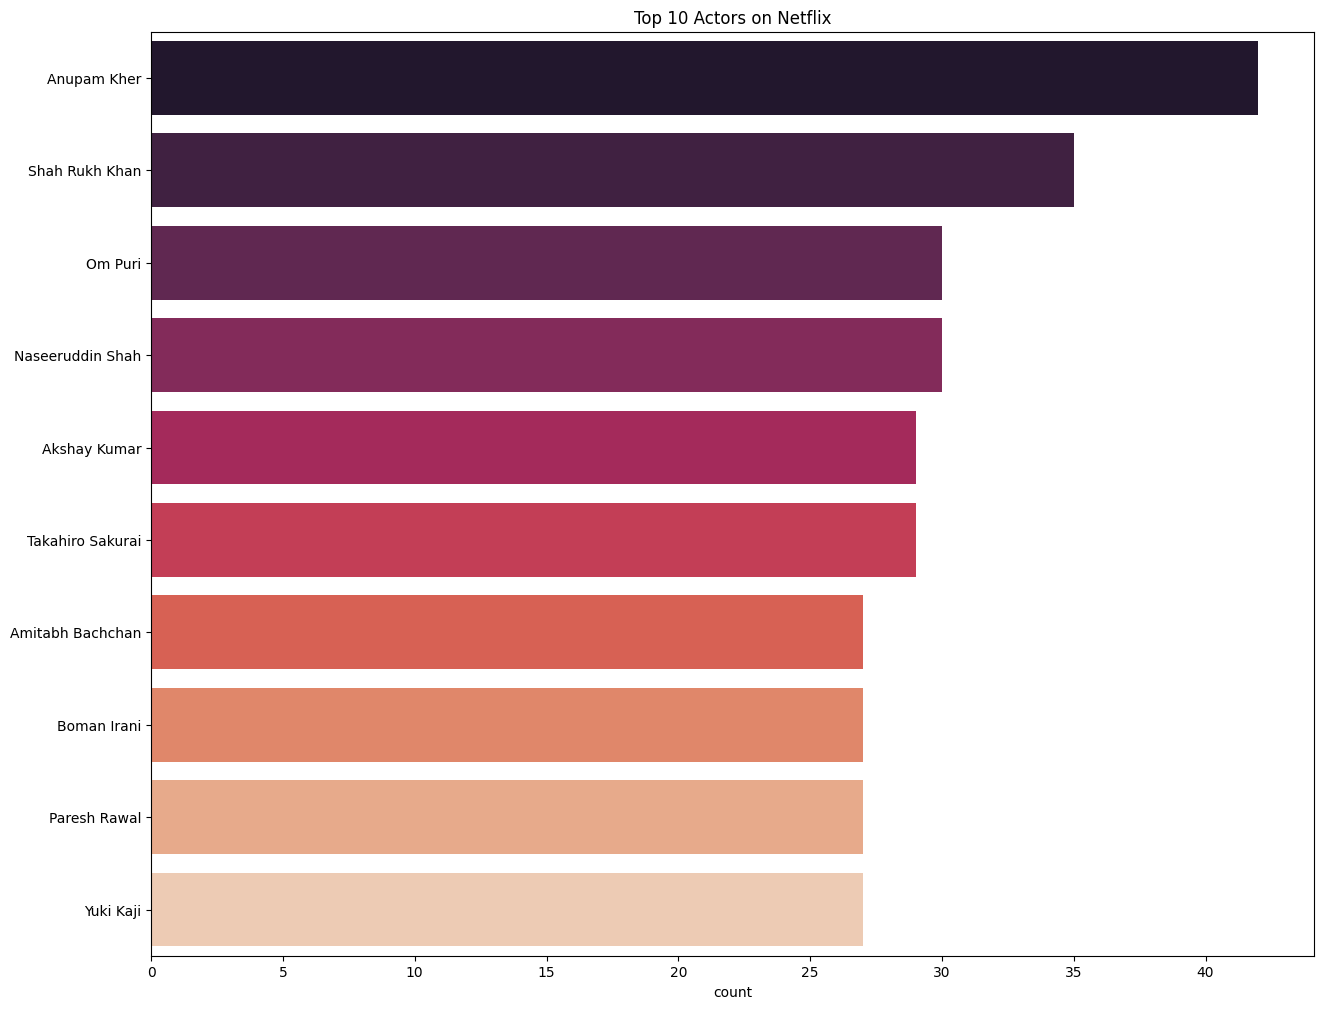

In [175]:
# Chart - 8 visualization code
plt.figure(figsize=(15,12))
actor = df_netflix[df_netflix.cast != 'Unknown'].set_index('title').cast.str.split(', ', expand= True).stack().reset_index(level=1, drop=True)
sns.countplot(y= actor, order= actor.value_counts().index[:10], palette='rocket')
plt.title('Top 10 Actors on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is used to represent the counts of the observation present in the categorical variable

##### 2. What is/are the insight(s) found from the chart?

Anupam Kher plays  highest number of role in the movies followed by  Shahrukh Khan, Om Puri/Naseeruddin Shah.

#### Chart - 9 : Month on which Movie / TV Show Released on Netflix

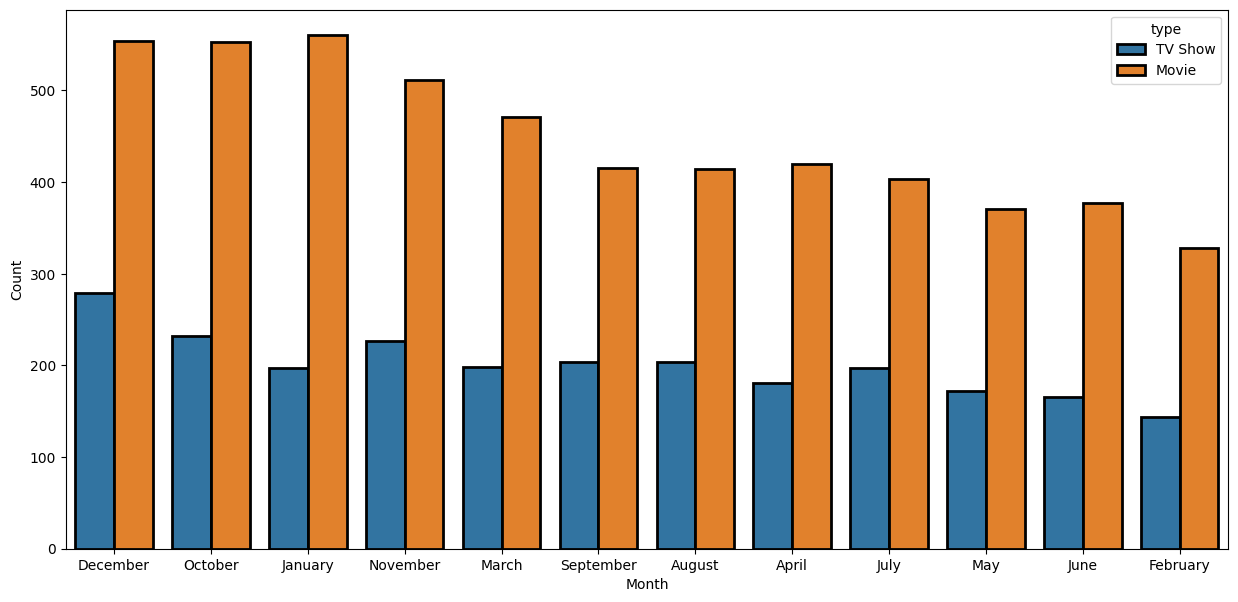

In [176]:
# Chart - 9 visualization code 
plt.figure(figsize=(15,7))
sns.countplot(data = df_netflix,x ='month_name_added', hue='type',lw=2, ec='black',order = df_netflix['month_name_added'].value_counts().index)
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()
     

##### 1. Why did you pick the specific chart?

The countplot is used to represent the counts of the observation present in the categorical variable

##### 2. What is/are the insight(s) found from the chart?

January month has the maximum number of movies and TV Shows released,followed by december,october,november.

#### Chart - 10 : Distribution of rating

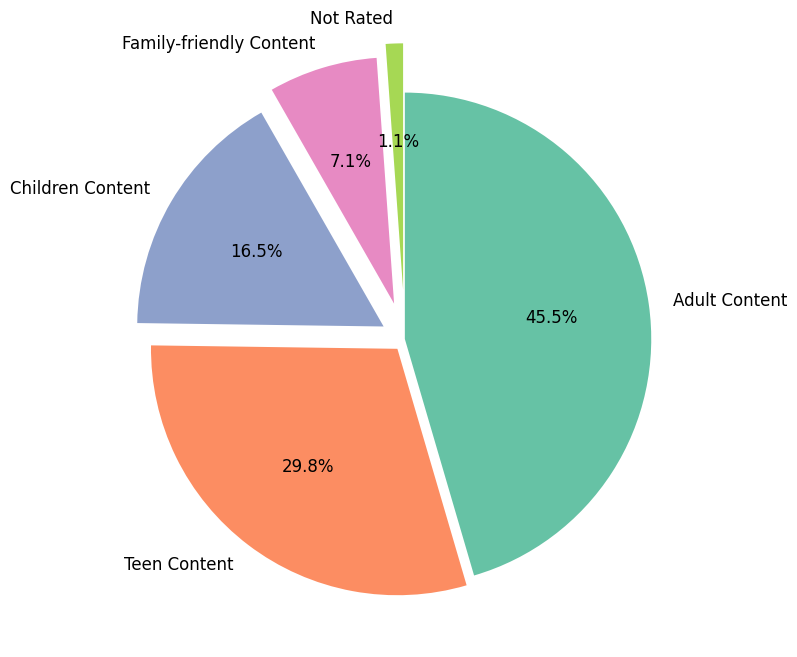

In [177]:
# Chart - 10 visualization code
df_rating = df_netflix['rating'].value_counts()
plt.figure(figsize=(8,8))
palette_color =sns.color_palette('Set2')
explode = [0,0.05, 0.1,0.15,0.20]
plt.pie(df_rating.values, labels=df_rating.index, colors=palette_color,explode=explode,textprops={'fontsize': 12},
        autopct='%1.1f%%',startangle=90, counterclock=False)
plt.show()
     
     

##### 1. Why did you pick the specific chart?

A pie plot is a proportional representation of the numerical data in a column.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can see that the most common rating in the Netflix dataset is Adults (TV-MA - Mature Audiences), which accounts for almost 47% of all titles. This is followed by Young Adults (TV-14 - Parents Strongly Cautioned) and Older Kids (TV-PG - Parental Guidance Suggested), which account for about 25% and 17% of titles, respectively.

#### Chart - 11 : Distribution of Content Rating on Netflix 

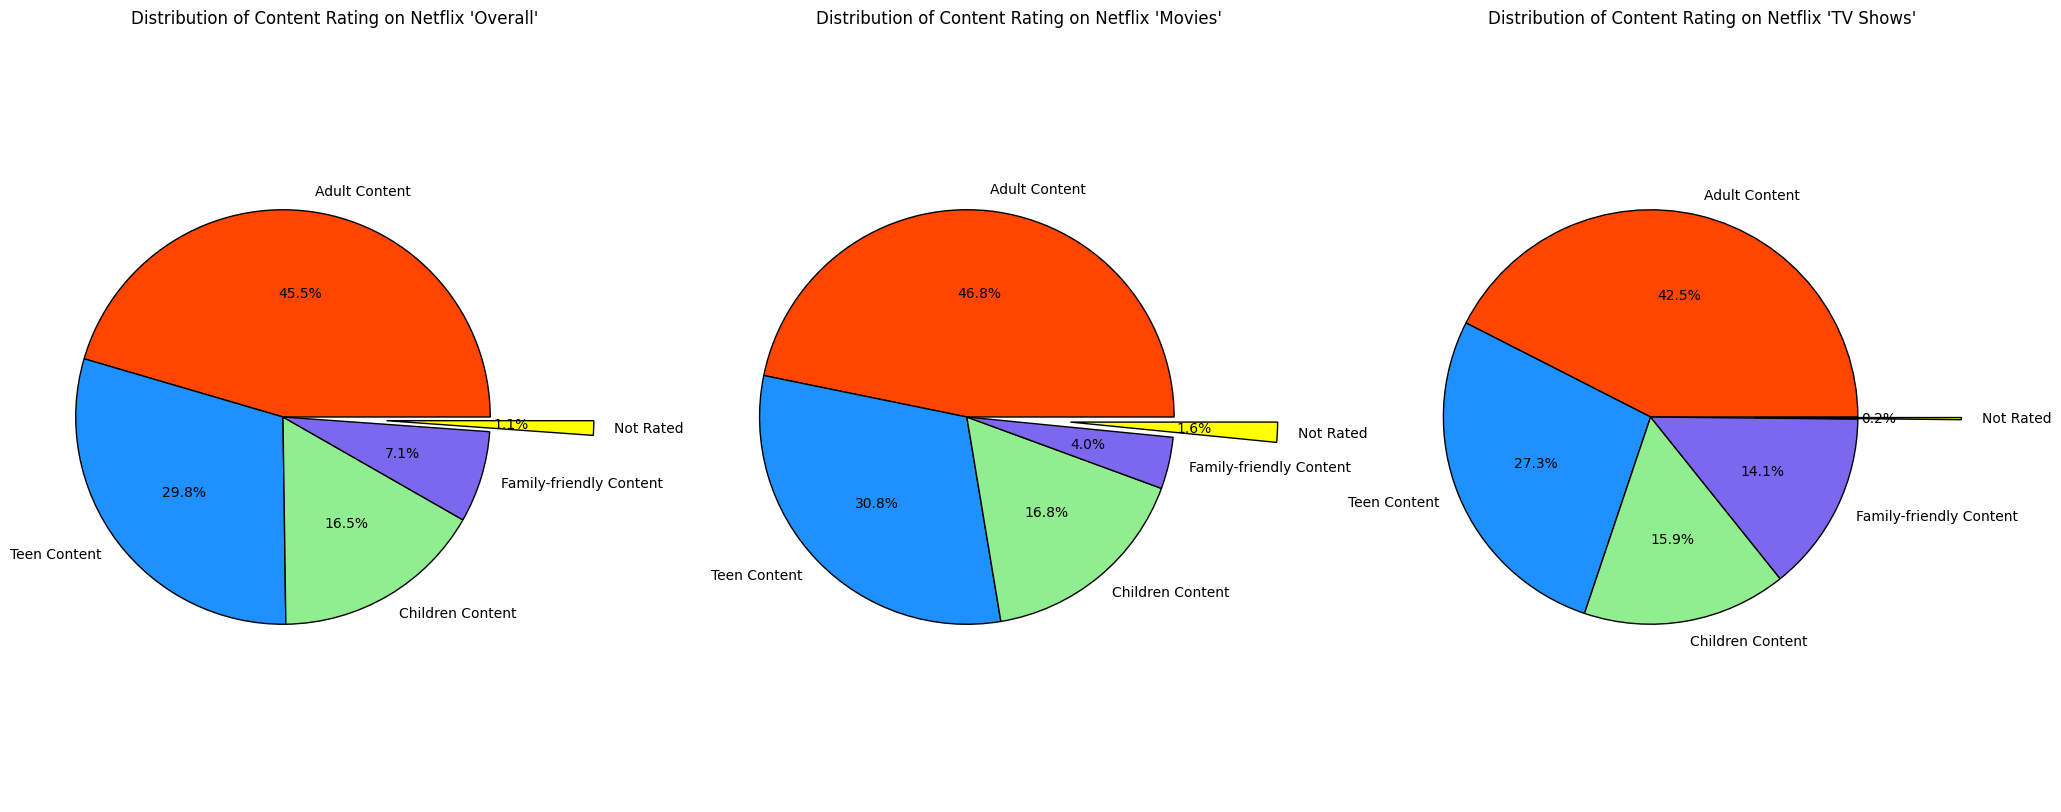

In [178]:
# Chart - 11 visualization code
plt.figure(figsize=(25,10))
for i,j,k in ((df_netflix, 'Overall',0),(df_movies, 'Movies',1),(df_tvshows, 'TV Shows',2)):
  plt.subplot(1,3,k+1)
  count= i['rating'].value_counts()
  plt.pie(count, labels=count.index,explode=(0,0,0,0,0.5),colors=['orangered','dodgerblue','lightgreen','mediumslateblue','yellow'],
          autopct='%1.1f%%', labeldistance=1.1,wedgeprops={"edgecolor" : "black",'linewidth': 1,'antialiased': True})
  plt.title(f"Distribution of Content Rating on Netflix '{j}'")
  plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

A pie plot is a proportional representation of the numerical data in a column.

##### 2. What is/are the insight(s) found from the chart?

We found that most of the content present in the Netflix belongs to Adult and the teen categories and  another important insight we can see that Family friendly content is  less in Movies compared to TV Shows.

#### Chart - 12 : Distribution of Movie Durations

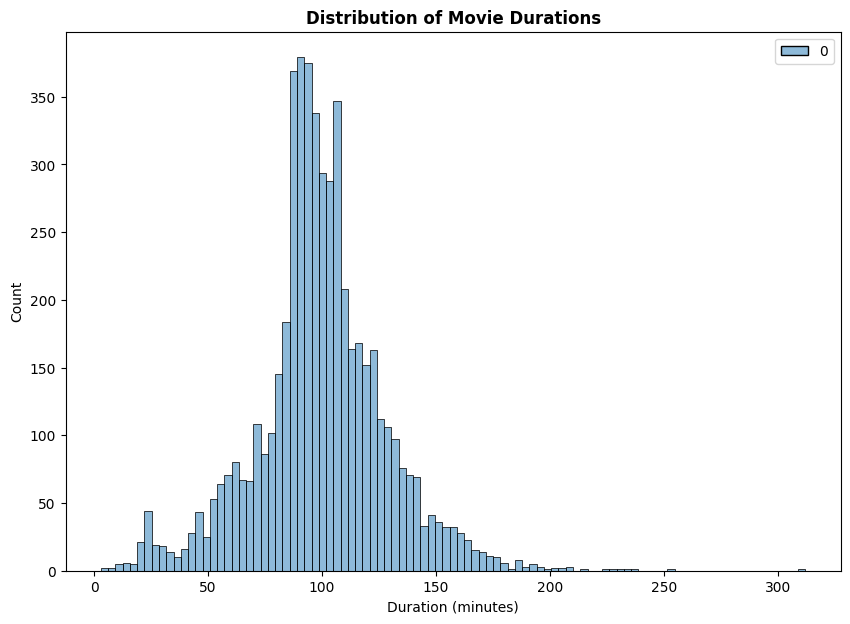

In [179]:
# Chart - 12 visualization code

plt.figure(figsize=(10, 7))
sns.histplot(df_movies['duration'].str.extract('(\d+)').astype(int), kde=False, color='red')
plt.title('Distribution of Movie Durations', fontweight='bold')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()
     


##### 1. Why did you pick the specific chart?

A histogram is a traditional visualization tool that counts the number of data that fall into discrete bins.

##### 2. What is/are the insight(s) found from the chart?

When analyzing the movie durations, it was observed that the majority of the movies have a duration between 50 to 150 minutes and some movies upto 200 minutes.

## ***5. Feature Engineering & Data Pre-processing***

## 1. Handling Missing Values

In [180]:
# Handling Missing Values & Missing Value Imputation
df_netflix.isna().sum()
     

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
month_added         0
month_name_added    0
year_added          0
lead_actor          0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Since we have already dealed with null values no imputation techniques are required.

## 2. Handling Outliers

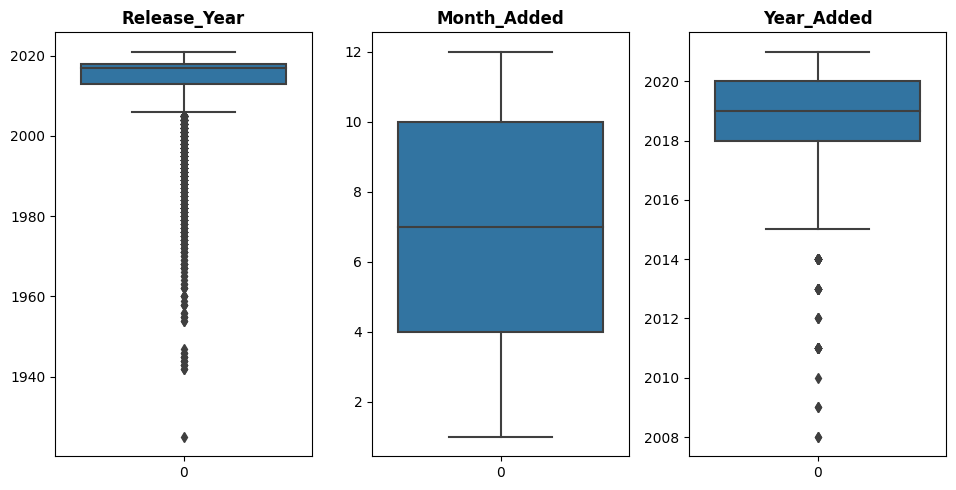

In [181]:
# Handling Outliers & Outlier treatments# Storing the continous value feature in a separate list
continous_num_feature= ["release_year","month_added","year_added"]

# checking outliers with the help of box plot for continous features
plt.figure(figsize=(16,5))
for n,column in enumerate(continous_num_feature):
  plt.subplot(1, 5, n+1)
  sns.boxplot(df_netflix[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()
     

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have only 3 continous features in the dataset as other as textual data.Although we have some of the anomalies in continous feature but we will not treat by considering outliers as some of the Movies/TV Shows has released or added early on Netflix.

## 3. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [182]:
# Expand Contraction
# Now,lets combine all clustering attributes into one column

df_netflix['clustering_attributes'] = (df_netflix['director'] + ' ' + 
                                df_netflix['cast'] +' ' + 
                                df_netflix['country'] +' ' + 
                                df_netflix['listed_in'] +' ' + 
                                 df_netflix['type'] +' ' + 
                                  df_netflix['duration'] +' ' + 
                                df_netflix['description'])
#Checking after imputation
df_netflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year         rating   duration  \
0 2020-08-14          2020  Adult Content  4 Seasons   
1 2016-12-23          2016  Adult Content     93 min   
2 2018-12-20          2011  Adult Content     78 min   
3 2017-11-16          2009   Teen Content     80 min   
4 2020-01-01          2008   Teen Content    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month_added  \
0  In a future where the elite inhabit an island ...            8   
1  After a devastating earthquake hits Mexico Cit...           12   
2  When an army recruit is found dead, his fellow...           12   
3  In a postapocalyptic world, rag-doll robots hi...           11   
4  A brilliant group of students become card-coun...            1   

  month_name_added  year_added     lead_actor  \
0           August        2020    João Miguel   
1         December        2016  Demián Bichir   
2         December        2018      Tedd Chan   
3         November        2017    Elijah Wood   
4          January        2020   Jim Sturgess   

                               clustering_attributes  
0  Unknown João Miguel, Bianca Comparato, Michel ...  
1  Jorge Michel Grau Demián Bichir, Héctor Bonill...  
2  Gilbert Chan Tedd Chan, Stella Chung, Henley H...  
3  Shane Acker Elijah Wood, John C. Reilly, Jenni...  
4  Robert Luketic Jim Sturgess, Kevin Spacey, Kat...

#### 2. Lower Casing

In [183]:
# Lower Casing
df_netflix['clustering_attributes']= df_netflix['clustering_attributes'].str.lower()

# Checking after imputation
df_netflix['clustering_attributes'][20]
     

'onir geetanjali thapa, zain khan durrani, shray rai tiwari, mona ambegaonkar, chandreyee ghosh, barun chanda, saheb bhattacharjee, shefali chauhan india dramas, independent movies, international movies movie 110 min after accidentally connecting over the internet, two strangers form a tight friendship – not knowing they already share a bond.'

#### 3. Removing Punctuations

In [184]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [185]:
#Removing Punctuations from the clustering_attributes
df_netflix['clustering_attributes']= df_netflix['clustering_attributes'].apply(remove_punctuation)

# Checking after imputation
df_netflix['clustering_attributes'][20]

'onir geetanjali thapa zain khan durrani shray rai tiwari mona ambegaonkar chandreyee ghosh barun chanda saheb bhattacharjee shefali chauhan india dramas independent movies international movies movie 110 min after accidentally connecting over the internet two strangers form a tight friendship – not knowing they already share a bond'

#### 4. Removing URLs & Removing words and digits contain digits.

In [186]:
# Remove URLs & Remove words and digits contain digits
def remove_url_and_numbers(text):
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'^https?:\/\/.*[\r\n]*')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [187]:
# Remove URLs & Remove words and digits contain digits
df_netflix['clustering_attributes']= df_netflix['clustering_attributes'].apply(remove_url_and_numbers)

In [188]:
# Checking after imputation
df_netflix['clustering_attributes'][20]

'onir geetanjali thapa zain khan durrani shray rai tiwari mona ambegaonkar chandreyee ghosh barun chanda saheb bhattacharjee shefali chauhan india dramas independent movies international movies movie     min after accidentally connecting over the internet two strangers form a tight friendship   not knowing they already share a bond'

#### 5. Removing Stopwords & Removing White spaces

In [189]:
# Remove Stopwords
# Downloading stopwords
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [190]:
# displaying stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [191]:
# creating function to remove  stopwords White spaces
def clear_text(text):
    """
    Remove stopwords and whitespaces from text.
    """
    # Tokenize text into individual words
    words = text.split()

    # Remove stopwords from the text
    words = [word for word in words if word.lower() not in stopwords.words('english')]

    # Join the remaining words back into a string
    clear_text = ' '.join(words)

    # Remove whitespaces
    clear_text = clear_text.strip()

    return clear_text

In [192]:
#Removing remove  stopwords White spaces from the clustering_attributes
df_netflix['clustering_attributes']= df_netflix['clustering_attributes'].apply(clear_text)
# Checking after imputation
df_netflix['clustering_attributes'][20]

'onir geetanjali thapa zain khan durrani shray rai tiwari mona ambegaonkar chandreyee ghosh barun chanda saheb bhattacharjee shefali chauhan india dramas independent movies international movies movie min accidentally connecting internet two strangers form tight friendship knowing already share bond'

#### 6. Tokenization

In [193]:
# Tokenization
# Downloading and importing needed libraries
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenization
df_netflix['clustering_attributes']=df_netflix['clustering_attributes'].apply(nltk.word_tokenize)

# Checking after imputation
df_netflix['clustering_attributes'][20]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['onir',
 'geetanjali',
 'thapa',
 'zain',
 'khan',
 'durrani',
 'shray',
 'rai',
 'tiwari',
 'mona',
 'ambegaonkar',
 'chandreyee',
 'ghosh',
 'barun',
 'chanda',
 'saheb',
 'bhattacharjee',
 'shefali',
 'chauhan',
 'india',
 'dramas',
 'independent',
 'movies',
 'international',
 'movies',
 'movie',
 'min',
 'accidentally',
 'connecting',
 'internet',
 'two',
 'strangers',
 'form',
 'tight',
 'friendship',
 'knowing',
 'already',
 'share',
 'bond']

#### 7. Text Normalization

In [194]:
# Normalizing Text ( Lemmatization )
#importing needed libraries
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
# Function to lemmatize 
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [195]:
# Lemmatization
df_netflix['clustering_attributes']= df_netflix['clustering_attributes'].apply(lemmatize_verbs)

In [196]:
# Checking after imputation
df_netflix['clustering_attributes'][20]

['onir',
 'geetanjali',
 'thapa',
 'zain',
 'khan',
 'durrani',
 'shray',
 'rai',
 'tiwari',
 'mona',
 'ambegaonkar',
 'chandreyee',
 'ghosh',
 'barun',
 'chanda',
 'saheb',
 'bhattacharjee',
 'shefali',
 'chauhan',
 'india',
 'dramas',
 'independent',
 'movies',
 'international',
 'movies',
 'movie',
 'min',
 'accidentally',
 'connect',
 'internet',
 'two',
 'strangers',
 'form',
 'tight',
 'friendship',
 'know',
 'already',
 'share',
 'bond']

##### Which text normalization technique have you used and why?

Here we are using lemmatizatiom technique for  reducing the   different forms of a word to one single form, for example, reducing "builds", "building", or "built" to the lemma "build": Lemmatization is the process of grouping inflected forms together as a single base form.

#### 8. Text Vectorization

In [197]:
# Vectorizing Text
#importing the neccessary library
from sklearn.feature_extraction.text import TfidfVectorizer

# Using TFIDF vectorizer to vectorize the corpus 

# Tokenization
def tokenizer(text):
  return text

tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
x = tfidf.fit_transform(df_netflix['clustering_attributes'])

In [198]:
# Dataset Rows & Columns count
x.shape

(7777, 20000)

In [199]:
# converting X into array form
X = x.toarray()

In [200]:
# Checking the matrix
X    

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##### Which text vectorization technique have you used and why?

Text Vectorization is the process of converting text into numerical representation.
We will be using TF-IDF for Text vectorization:. TF-IDF  assigns higher values to rare words that are unique to a particular document, making them more important in the representation.

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

TF = (Number of times term t appears in a document) / (Total number of terms in the document)
IDF = log(Total number of documents/Number of documentswith the term in it)

## 4. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

After looking at the shape of the dataset after vectorization we can see thatthere is 30,000 attributes which is a huge dimension so we will be using Principal Component Analysis(PCA) for reducing the dimension of our dataset..

In [201]:
# DImensionality Reduction 
#importing PCA
from sklearn.decomposition import PCA
     
# using PCA to project data to lower dimensional space

pca = PCA(random_state=42)
pca.fit(x.toarray())    

PCA(random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

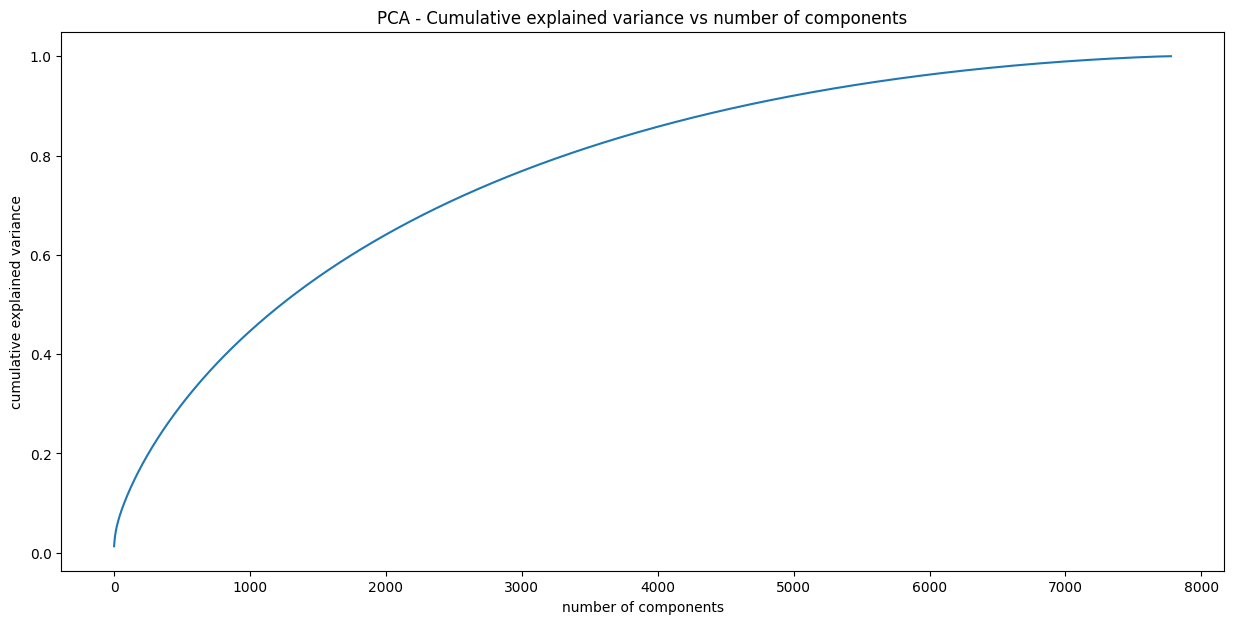

In [202]:
# Explained variance

plt.figure(figsize=(15,7))

# Plot showing Cumulative explained variance vs number of components'
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show

In [203]:
##  capturing 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

(7777, 5646)

It is clear from the above plot that 7777 principal components can capture the 100% of variance.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used PCA (Principal Component Analysis) for dimensionality reduction. PCA is a widely used technique for reducing the dimensionality of high-dimensional data sets while retaining most of the information in the original data.

## ***6. ML Model Implementation***

### ML Model - 1 : K-means clustering

K-means clustering is an unsupervised learning technique to classify unlabeled data by grouping them by features, rather than pre-defined categories. The variable K represents the number of groups or categories created. The goal is to split the data into K different clusters and report the location of the center of mass for each cluster. Then, a new data point can be assigned a cluster (class) based on the closed center of mass.

**Elbow Method**

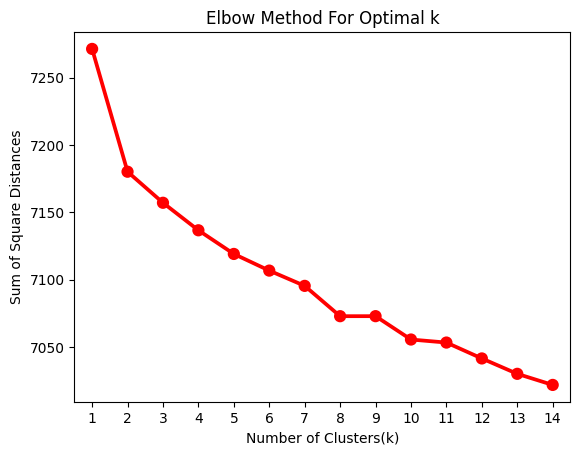

In [204]:
# Determining optimal value of K using Elbow Method
from sklearn.cluster import KMeans
sum_of_square_dist = {}

for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(x_transformed)
    sum_of_square_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters :

sns.pointplot(x = list(sum_of_square_dist.keys()), y = list(sum_of_square_dist.values()),color="red")
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()
     

In the above plot, the elbow is at k=6, indicating the optimal k for this dataset is 6.let's plot one more chart that itterates over the same number of clusters and determines the Silhouette Score at every point.

**Get optimum value of k using Metric:Shilhouette Score**:
The Silhouette score in the K-Means clustering algorithm is between -1 and 1. This score represents how well the data point has been clustered, and scores above 0 are seen as good, while negative points mean your K-means algorithm has put that data point in the wrong cluster.The silhouette score is useful for comparing different clustering algorithms, selecting the optimal number of clusters, and assessing the overall quality of the clustering solution

In [205]:
## Determining optimal value of K using silhouette_score
from sklearn.metrics import silhouette_score

  
range_n_clusters = [2,3,4,5,6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(x_transformed)
    centers = clusterer.cluster_centers_

    score = silhouette_score(x_transformed, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
    


For n_clusters = 2, silhouette score is 0.009888616727455954
For n_clusters = 3, silhouette score is 0.010388014418189246
For n_clusters = 4, silhouette score is 0.003353790581626702
For n_clusters = 5, silhouette score is 0.003963603325254071
For n_clusters = 6, silhouette score is 0.011945123210095982
For n_clusters = 7, silhouette score is 0.005230860472965699
For n_clusters = 8, silhouette score is 0.006915682669322088


From the above plots (Elbow plot and Sillhouette plot) it is very clear that the Silhoutte score is comparatively good for 6 number of clusters, so we will consider 6 cluster in kmeans analysis.

**Building 6 clusters using K-Means cluster**

In [206]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=33)
kmeans.fit(x_transformed)

KMeans(n_clusters=6, random_state=33)

In [207]:
# Evaluation metrics - distortion, Silhouette score

kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_transformed, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(7108.275246447624, 0.004042066342628069)


In [208]:
len(kmeans.labels_)

7777

In [209]:
kmeans.labels_

array([4, 3, 3, ..., 3, 4, 3], dtype=int32)

In [210]:
# Adding a kmeans cluster number attribute
df_netflix['kmeans_cluster'] = kmeans.labels_

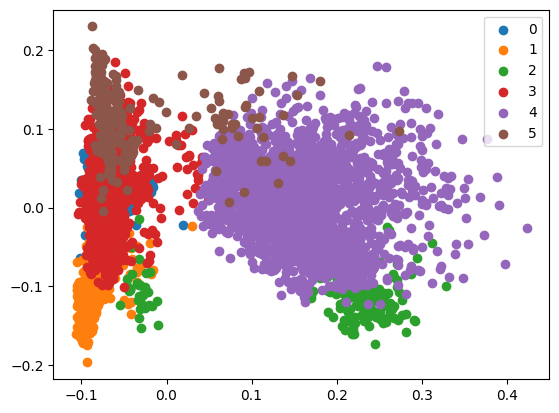

In [211]:
#predict the labels of clusters.
label = kmeans.labels_

#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()
     

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [212]:

def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''
    
    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS
    
    # Filter the data by the specified cluster number and column name
    df_wordcloud = df_netflix[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0] 
    
    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])
    
    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)
    
    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()
    
    # Return the numpy array
    return image_array

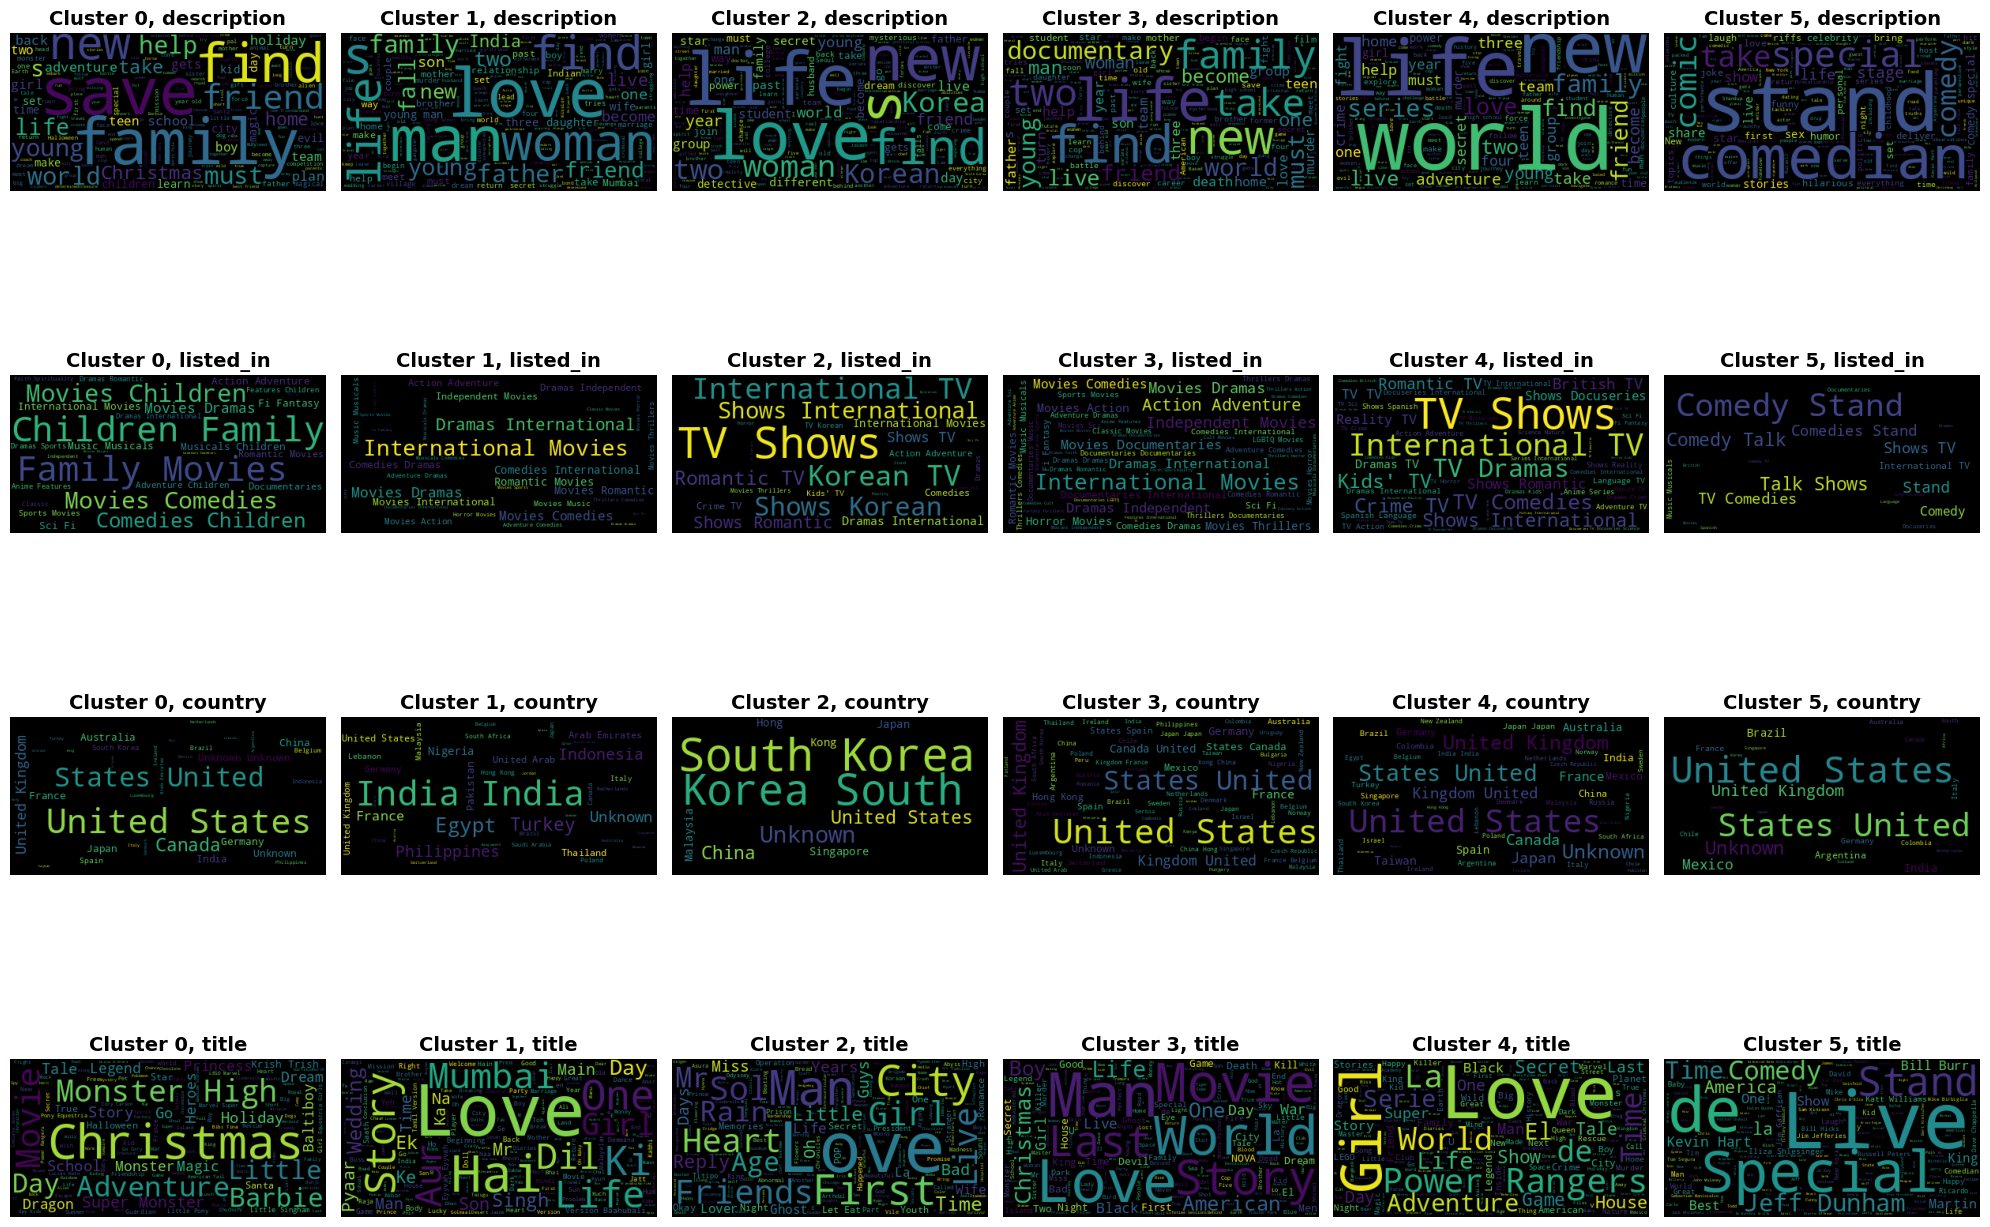

In [213]:
# Implementing the wordcloud function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 15))
for i in range(6):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')    
plt.tight_layout()
plt.show()

### ML Model - 2 : Hierarchial Clustering

Hierarchical clustering is a popular method for grouping objects. It creates groups so that objects within a group are similar to each other and different from objects in other groups. Clusters are visually represented in a hierarchical tree called a dendrogram.

Let's first plot the dendrogram and find the optimal number of clusters

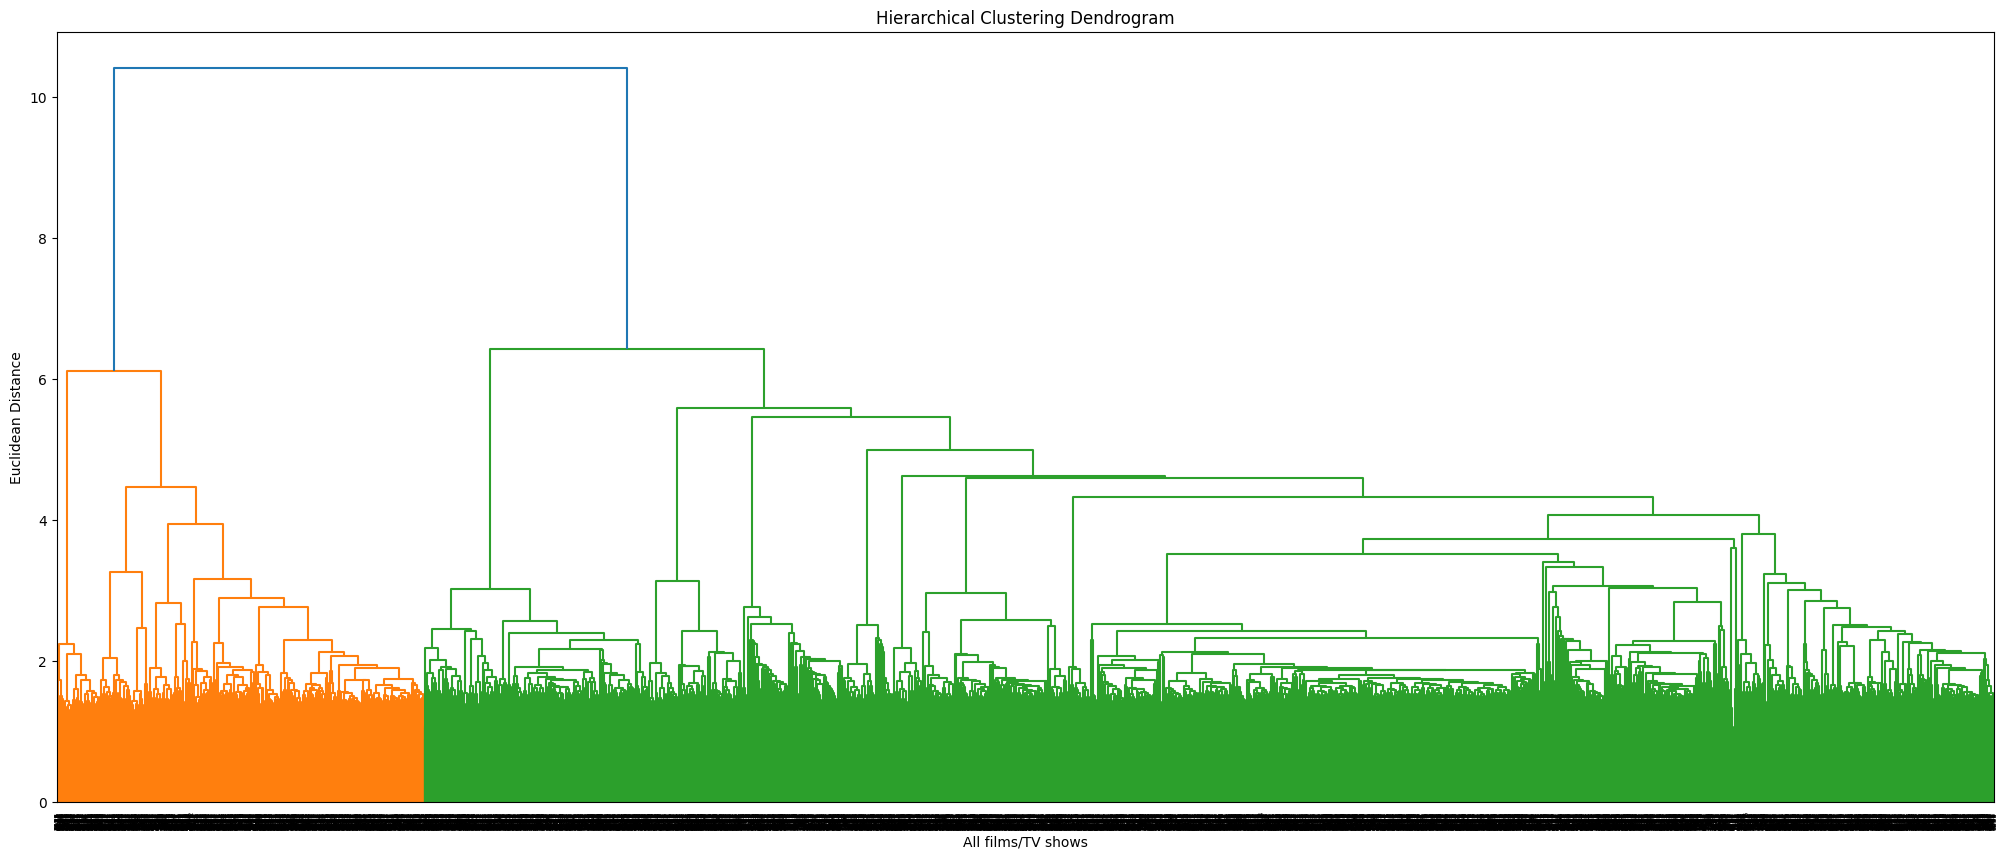

In [214]:
#importing needed libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# Hierarchial Clustering
distances_linkage = linkage(x_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = False)
plt.show()
     

A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters.

let's check the silhouette scores using Agglomerative clustering and we will do bottom up approach here.



In [215]:
#Checking Silhouette score 
# Importing needed libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above
k_range = range(2, 8)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x_transformed, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.003146
k=3, Silhouette score=0.003809
k=4, Silhouette score=-0.000026
k=5, Silhouette score=0.000814
k=6, Silhouette score=0.001214
k=7, Silhouette score=0.001988


In [216]:
# Agglomerative Hierarchical Clustering Algorithm Implementation
hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  

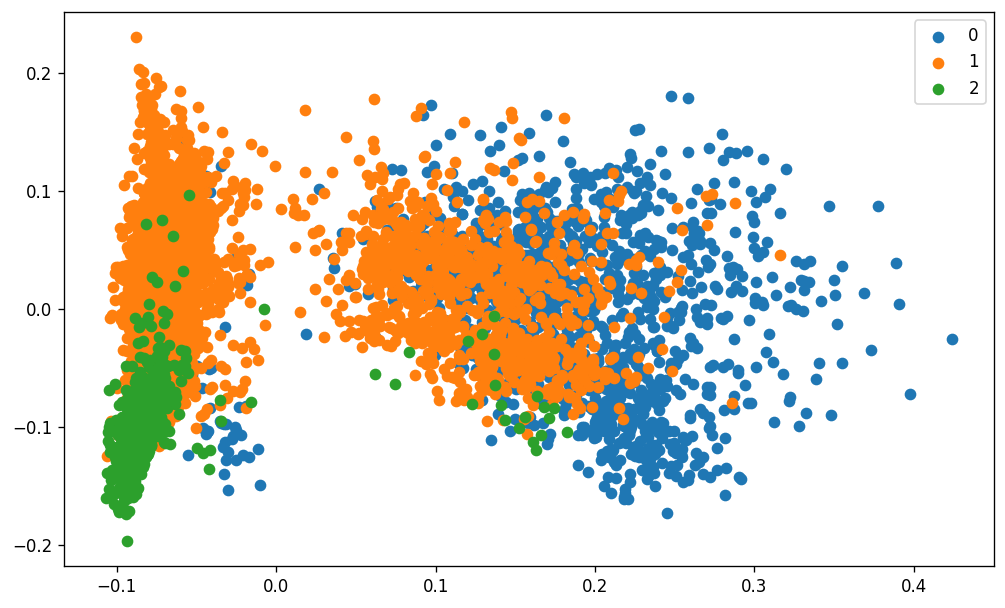

In [217]:
#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = hierarchical.fit_predict(x_transformed)

#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

In [218]:
# Assigning the cluster values to the dataset
df_netflix['Hierarchical_cluster'] =hierarchical.labels_
      

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [219]:
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df_netflix[['Hierarchical_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['Hierarchical_cluster'] == cluster_number]
  
  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])
  
  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)
  
  # Return the word cloud object
  return wordcloud

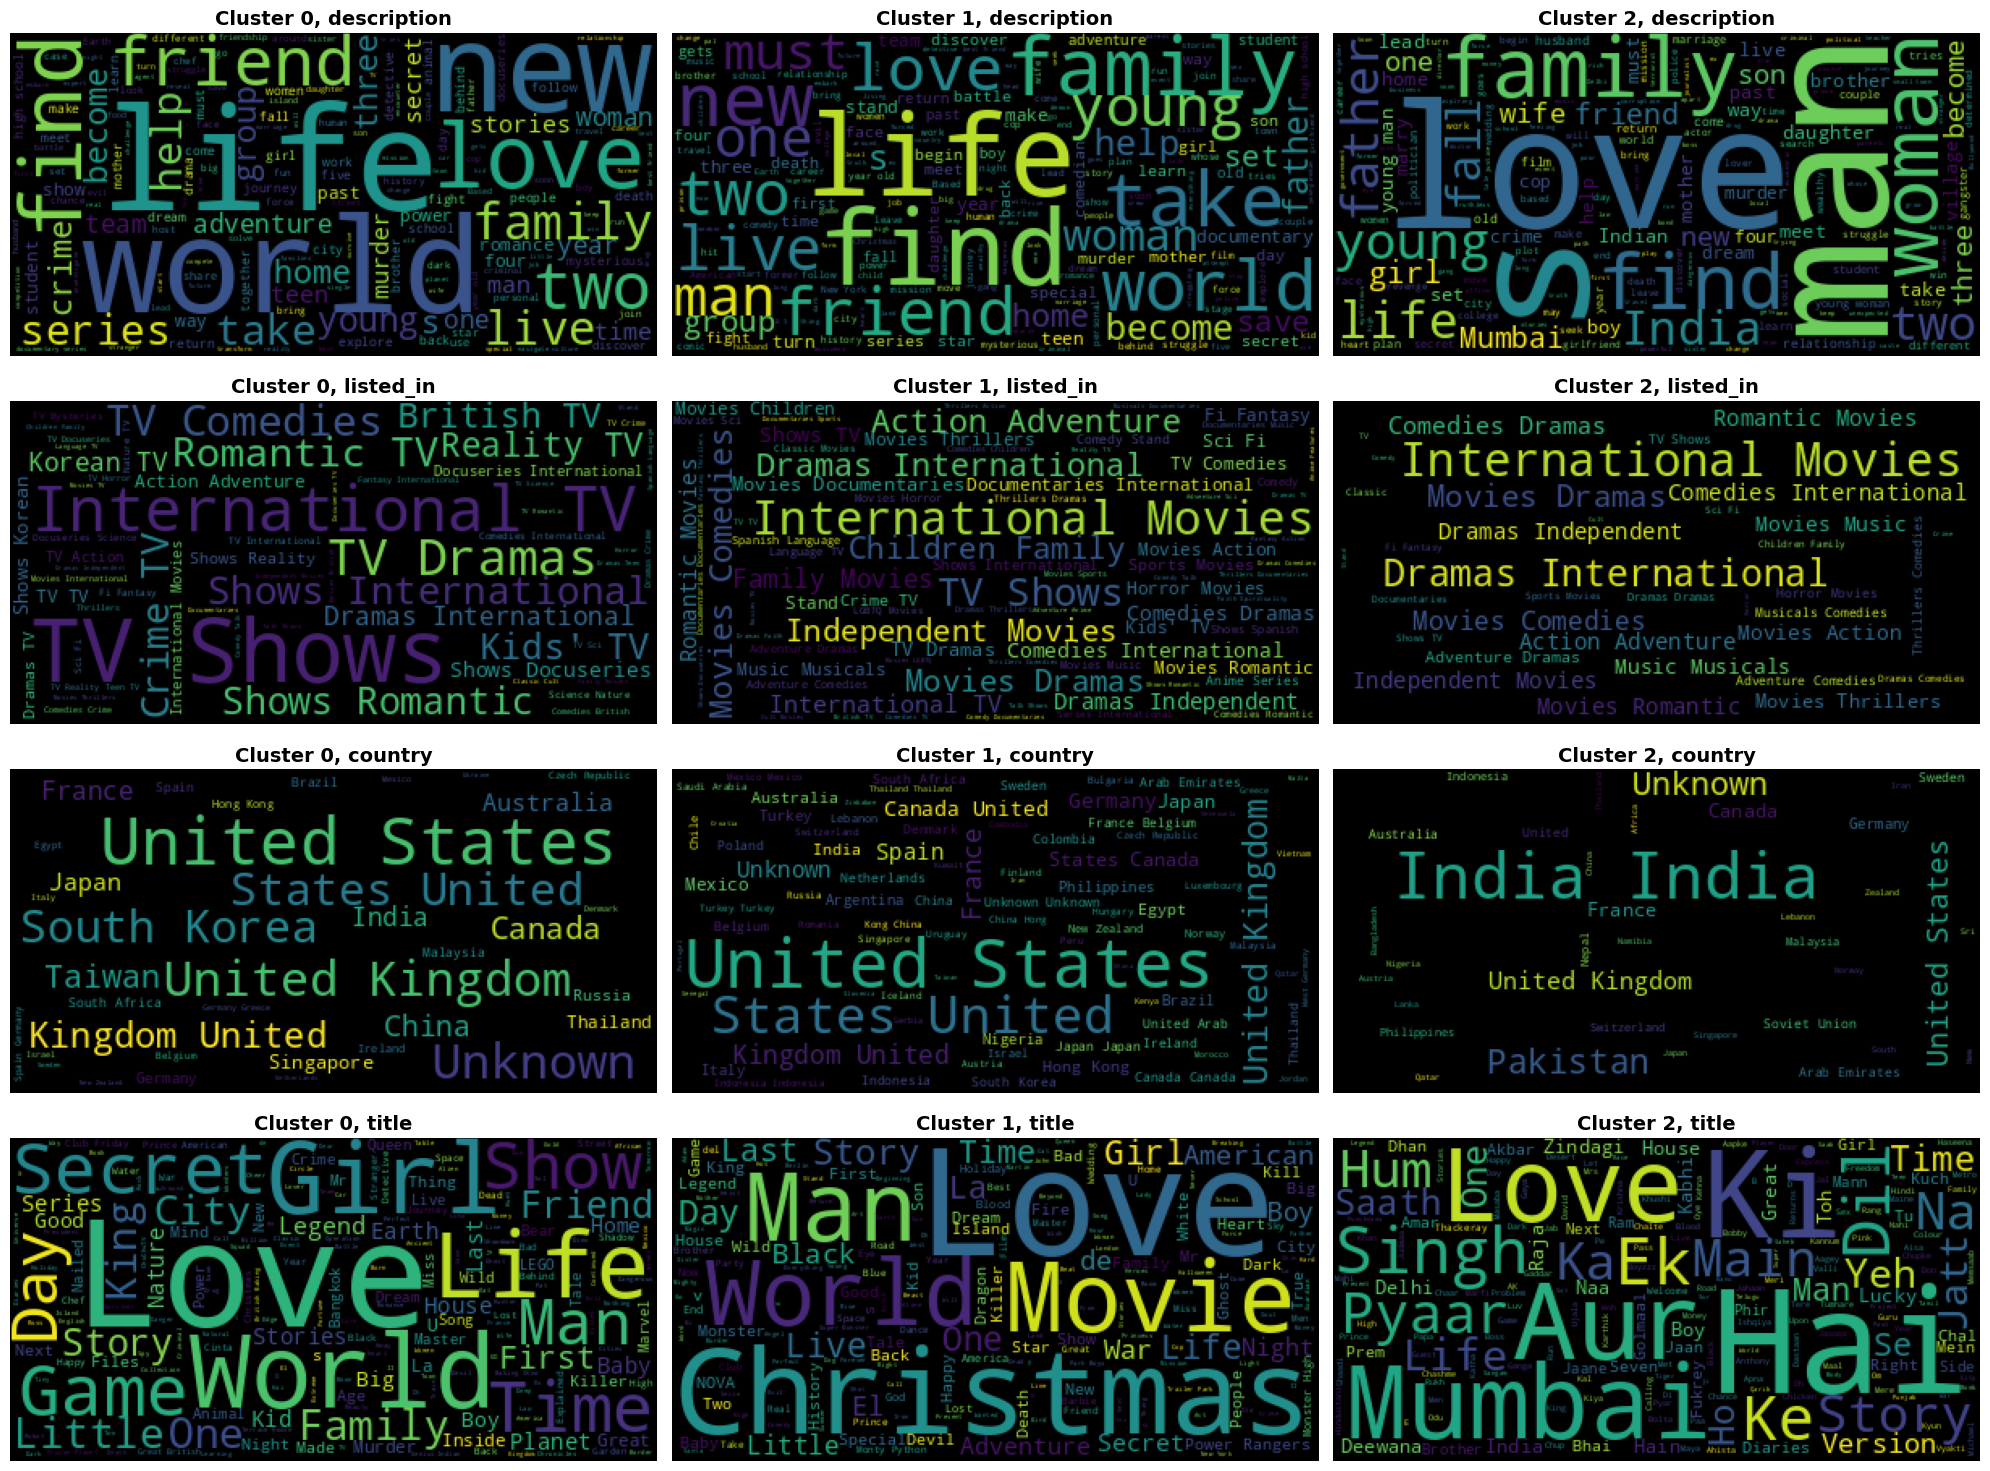

In [220]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
for i in range(3):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Here Silhouette score is preferred over the distortion score when evaluating clustering algorithms because it takes into account both the cohesion and separation of the clusters, whereas the distortion score only measures how tightly the data points are clustered around their respective centroids. Therefore, the Silhouette score can provide a more suitable evaluation of the clustering algorithm's performance, particularly when dealing with non-spherical or irregularly shaped clusters.

 Silhouette score can help to ensure that the resulting clusters are both internally coherent and well-separated from each other, which can ultimately lead to more meaningful insights about the data.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have considered K-means as our final model, as we are getting the comparatevely high Silhoutte Score in K-means clustering.It works by dividing a set of data points into k clusters based on the distance between the data points and their assigned cluster centers. The algorithm aims to minimize the sum of squared distances between each data point and its assigned cluster center.Additionally, k-means clustering is easy to interpret and can provide meaningful insights into the data.

Other clustering algorithms, such as hierarchical clustering or density-based clustering, may have their own strengths and weaknesses. However, k-means clustering is a popular choice for many applications and can be a good starting point for exploring and analyzing data.

# **Conclusion**

**Conclusion from EDA**

. Top  Tvshow Director is Alastair Fothergill  with 3 tv shows and top movie making Directors is Raúl Campos, Jan Suter with 18 movies.

. While comparing TV shows and movies,movies always has the upperhand as the number of movies per year keeps on increasing every year but there was a decrease in the number of movies in 2020, this pattern did not effect the number of TV Shows added in the same year.

. United States has the most content in both movies and tv shows where as egypt has lowest number of tv shows and south korea in movies.

. There are 69.14% share of Movies while on the other hand 30.86% of TV Shows.

. We found  that drama has largest value_counts for movies and comedies has the second large value_counts for movies.

. For Movies : The maximum number of Movies were released in netflix in between 2015-2020 with the highest number of release on the year 2017.

For TV Shows : The maximum number of TV Shows were released in netflix in between 2015-2020 with the highest number of release on the year 2020.

. The distribution of TV show durations in seasons on Netflix shows that the most common duration for TV shows on Netflix is one season, followed by two seasons.

. Anupam Kher plays highest number of role in the movies followed by Shahrukh Khan, Om Puri/Naseeruddin Shah.

. January month has the maximum number of movies and TV Shows released,followed by december,october,november.

. The most common rating in the Netflix dataset is Adults (TV-MA - Mature Audiences), which accounts for almost 47% of all titles. This is followed by Young Adults (TV-14 - Parents Strongly Cautioned) and Older Kids (TV-PG - Parental Guidance Suggested), which account for about 25% and 17% of titles, respectively.

. Most of the content present in the Netflix belongs to Adult and the teen categories and another important insight we can see that Family friendly content is less in Movies compared to TV Shows.

. The majority of the movies have a duration between 50 to 150 minutes and some movies upto 200 minutes.
 





**Conclusion from ML Models**

. We have implemented K-Means Clustering and Agglomerative Hierarchical Clustering, to cluster the Netflix Movies TV show dataset.

. The optimal number of clusters we are getting from K-means is 6, and for Agglomerative Hierarchical Clustering the optimal number of clusters we  found are 3.

. we have taken evaluation matrix silhoutte score over distortion score as it provide a more suitable evaluation of the clustering algorithm's performance, particularly when dealing with non-spherical or irregularly shaped clusters.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***